# Analiza dźwięku w Pythonie

Będziemy korzystać z pakietów PyAudio (do nagrywania dźwięku), NumPy (jako użyteczna biblioteka funkcji, głównie Szybkiej Transformacji Fouriera FFT) oraz Matplotlib (jako biblioteka obsługująca wykresy). Bieżący dokument pisany jest przy użyciu technologii IPython Notebook, która pozwala mi na jednoczesne pisanie kodu i schludny opis w dokumencie.

Poniżej przedstawiam metodę na uzyskanie wykresu dźwięku zarejestrowanego przez mikrofon.


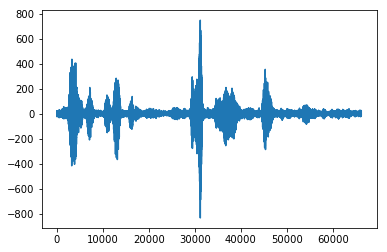

In [14]:
import pyaudio
import matplotlib.pyplot as plt
import numpy as np

FSAMP = 22050
TIME = 3
FRAME_SIZE = FSAMP * TIME

audio = pyaudio.PyAudio()

stream = audio.open(format=pyaudio.paInt16,
                    channels=1,
                    rate=FSAMP,
                    input=True,
                    frames_per_buffer=FRAME_SIZE)
stream.start_stream()
buf = np.fromstring(stream.read(FRAME_SIZE), np.int16)
plt.plot(buf)
plt.show()

Zanim opiszę program, odrobina teorii. Zjawisko dźwięku możemy rozumieć jako rozchodzące się zaburzenie w ośrodku sprężystym, np. powietrzu. Tak się składa, że dźwięk dochodzący do danego punktu w danej chwili czasu można opisywać za pomocą tylko jednego parametru liczbowego, np. zgęstnienia powietrza, odchylenia membrany mikrofonu lub głośnika, natężenia głośności etc. Aby nie angażować absolutnych wartości gęstości lub natężeń, na wykresie podawana jest __różnica__ pomiędzy aktualną wartością a wartością w stanie spoczynku.

Z tego powodu możliwe jest przenoszenie dźwięku za pośrednictwem prądu - mikrofon rejestruje odchylenia membrany, zamienia je na zmienne w czasie natężenie prądu w obwodzie elektrycznym, owe natężenie odbierane jest w innym punkcie (np. wiele kilometrów dalej) przez głośnik i przetwarzane z powrotem na dźwięk.

Stąd też tak łatwo przedstawić dźwięk na dwuwymiarowym wykresie. Każdy punkt wykresu opisuje chwilowe wychylenie układu z położenia równowagi.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pyaudio

FSAMP = 22050
TIME = 3
FRAME_SIZE = FSAMP * TIME

Teraz wreszcie mogę opisać parametry użyte w powyższym kodzie. Na samym początku importuję biblioteki - __NumPy__ jako przydatną bibliotekę numeryczną, __Matplotlib__ aby być w stanie rysować wykresy, oraz __PyAudio__ - jako używany w owym stroiku do gitary interface do komunikacji Pythona z urządzeniami nagrywającymi.

Parametr FSAMP opisuje częstotliwość próbkowania (Frequency SAMPling) - ile razy w ciągu sekundy mikrofon będzie rejestrował odchylenie od stanu równowagi. Im więcej tym lepiej, ale ponieważ ucho ludzkie nie słyszy dźwięków powyżej 20 kHz (czyli zmian natężenia zmieniających się 20,000 razy na sekundę) nie ma co szaleć i nie trzeba znacznie przekraczać zbliżonej częstotliwości próbkowania. Dokładniej - jeśli chcemy rejestrować dźwięki do 20,000 Hz potrzebujemy częstotliwości próbkowania rzędu 40,000 Hz - jednak przy nagraniach gorszej jakości możemy zadowolić się połową skali, zwyczajnie ucinając zbyt wysokie tony.

(Dlaczego dokładnie 22050 Hz? Jest to połowa częstotliwości próbkowania Audio CD ustalonej przez firmy zajmującej się rejestrowaniem dźwięku - m.in. Sony i Philips. Dodatkowo liczba 44100 jest iloczynem kwadratów czterech początkowych liczb pierwszych, co ułatwia podział danych przy zapisie)

Parametr TIME opisuje liczbę sekund rejestrowania dźwięku. Ponieważ w tym przypadku chcemy przez 3 sekundy rejestrować sygnał z częstotliwością 22050 na sekundę, potrzebujemy tablicy o rozmiarach $22050\cdot3$ - parametr FRAME_SIZE.


In [16]:
audio = pyaudio.PyAudio()
stream = audio.open(format=pyaudio.paInt16,
                    channels=1,
                    rate=FSAMP,
                    input=True,
                    frames_per_buffer=FRAME_SIZE)

Inicjalizacja interfejsu dla rejestracji dźwięku: 

__Format__ rejestrowania danych jest w Int16, tj. liczbach całkowitych zapisywanych za pomocą 16 bitów. Ponownie, większa precyzja zapisu danych (np. liczb 64-bitowych) jest możliwa (o ile sprzęt nagrywający pozwala na taką precyzję), ale do nagrywania podstawowych dźwięków zupełnie wystarcza 16 bitów.

__Kanały__ określają liczbę... kanałów na których nagrywany jest dźwięk. Mój laptop ma bardzo prosty mikrofon nagrywający dźwięk w zasadzie punktowo. Jeśli pokusiłbym się o profesjonalne nagrywanie muzyki, mógłbym kupić kilka mikrofonów nagrywających dźwięk w różnych punktach i transmitujących sygnał do jednego urządzenia - wtedy nagrywałbym dźwięk __wielokanałowo__ i potrzebowałbym odpowiednio wielokrotnie większej tabeli danych na pomieszczenie wszystkich informacji.

__CZĘSTOTLIWOŚĆ__ została już wcześniej omówiona - przesyłamy do funkcji informację jak wiele razy na sekundę urządzenie rejestruje dźwięk.

Dając wartość parametru __INPUT = True__ informujemy program, że będziemy zbierać dźwięk z mikrofonu. Gdybyśmy odpowiednio dopisali jeszcze parametr __OUTPUT = True__ otworzylibyśmy również możliwość wysyłania strumienia danych w celu odtworzenia nagrania na głośnikach.

Parametr __FRAMES_PER_BUFFER__ informuje program jak wiele punktów pomiarowych ma zostać wykonanych zanim nie zostanie zapełniony bufor. Ponieważ nagranie przeprowadzane jest tylko raz, tym razem będzie to wartość częstotliwości próbkowania razy całkowity czas nagrania. W poprzednim programie do strojenia gitary były to znacznie niższe wartości - program np. wykonywał pomiar przez 1024 klatki (czas trwania 1024/22050 sekundy), zapisywał dane do bufora mieszczącego 1024 liczby, przetwarzał bufor, po czym zaczynał operację od początku.


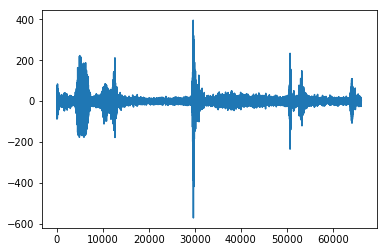

In [17]:
stream.start_stream()
buf = np.fromstring(stream.read(FRAME_SIZE), np.int16)
plt.plot(buf)
plt.show()

Tutaj nakazujemy programowi zacząć zbieranie danych (do zapełnienia bufora), po czym za pomocą funkcji z biblioteki NumPy przetwarzamy surowe dane z postaci skondensowanego łańcucha znaków do postaci liczb. Następnie wysyłamy ową tablicę do funkcji __plot__ z Matplotlib i rysujemy. Dzięki temu dostajemy znany obrazek zapisu dźwięku.

## Transformacja Fouriera

No dobrze, ale skrypt miał w zasadzie być poświęcony transformacji Fouriera, a nie powiedziałem na ten temat ani słowa. Otóż kiedy opisujemy dźwięk znacznie częściej zamiast wychylenia membrany używamy określenia __tonów__ i __częstotliwości__ - słyszymy taką-a-taką częstotliwość, rejestrujemy taki ton, i tak dalej. Przy tworzeniu muzyki bardzo uważamy, aby dźwięki generowane przez instrument były w częstotliwościach będących w prostych proporcjach z innymi częstotliwościami - inaczej mówimy, że intrument jest __rozstrojony__.

Stąd w opisie dźwięków bardzo przydatna staje się teoria szeregów Fouriera.

Dobrym wprowadzeniem do szeregów Fouriera jest np. [projekt konkursu Zobaczyć Matematykę](http://www.zobaczycmatematyke.pl/2015/1_szymon_piechaczek/) uczelni AGH. W skrócie - każdą 'porządną' funkcję można przedstawić za pomocą sumy funkcji trygonometrycznych sinus i cosinus, używanych przy opisie zjawisk falowych. Jeśli mamy opis zmiany parametru w czasie (np. nasz wykres przedstawiający nagranie dźwięku), mamy gwarancję istnienia odpowiedniej sumy sinusów i cosinusów o różnych częstotliwościach które są w stanie odtworzyć nasz wykres.

Banalnym przykładem będzie zapis pojedynczego tonu - przykład poniżej:

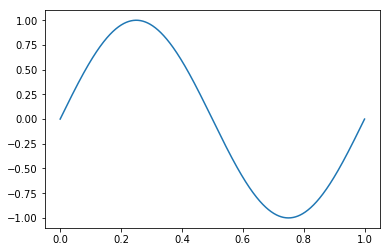

In [18]:
t = np.linspace(0,1,1024)
omega = 2*np.pi
plt.plot(t, np.sin(omega*t))
plt.show()

Zamiast podawać wartości dla kolejnych 1024 punktów, moglibyśmy po prostu powiedzieć: *hej, ta funkcja opisana jest za pomocą sinusa o jednostkowej amplitudzie i częstotliwości 1 Hz (albo częstości $2\pi$).*

Poniżej trochę bardziej skomplikowana funkcja - suma trzech funkcji trygonometrycznych:

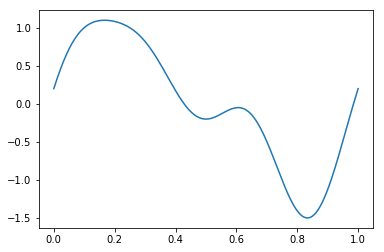

In [19]:
t = np.linspace(0,1,1024)
omega = 2*np.pi
plt.plot(t, np.sin(omega*t) + 0.5*np.sin(2*omega*t) + 0.2*np.cos(3*omega*t))
plt.show()

Ponownie, możemy albo opisywać wartość funkcji dla każdej chwili $t$ (funkcja dla $t=0$ ma wartość $0.2$, dla $t = 1/1024$ ma wartość 0.2122... i tak dalej), albo powiedzieć dla jakich wartości częstotliwości ma jakie wartości amplitud funkcji sinus i cosinus.

Proces znajdywania amplitud dla kolejnych częstotliwości nazywa się __analizą fourierowską__. W takim procesie bylibyśmy w stanie - dla dowolnych danych początkowych - znaleźć wszystkie współczynniki amplitud dla sinusów i cosinusów.

Jeśli chcielibyśmy skrótowo zapisać tak rozłożoną funkcję, moglibyśmy spróbować w ten sposób:

$$f(t_k) = \sum_j\Big(a_j\cos(\omega_jt_k)+b_j\sin(\omega_jt_k)\Big),$$

czyli - wartość funkcji $f$ dla konkretnego $x_i$ jest sumą funkcji trygonometrycznych dla wszystkich kolejnych wartości $k_j$.

Ważna uwaga - w komputerowej transformacji Fouriera wykonujemy zazwyczaj obliczenia na funkcjach zespolonych. Nawet jeśli nasz input jest czysto rzeczywisty, to po transformacji otrzymujemy __pary liczb__ - można je zapisać w postaci $x+\text iy$. Dlatego zamiast powyższego zapisu stosuje się:

$$f_k = \sum_{j=0}^{N-1} A_k  \exp\big(2\pi\text i\quad\frac jN\cdot k\big),$$

gdzie liczby $A_j$ są zespolone. Ponieważ $\exp\phi = \cos\phi + \text i\sin\phi$, z powyższego równania można uzyskać wcześniejszą postać sumy cosinusów. W tym wypadku zakładamy, że mamy bezwymiarową funkcję z wartościami na położeniach $0, 1, 2... N-1$. Jednak w analizie dźwięku używamy jednostek - każda wartość funkcji, nawet bezwymiarowa, rejestrowana jest w danej chwili czasu $t$. Powyższe równanie przyjmuje wtedy postać:

$$f(t) = \sum_{j=0}^{N-1} A_k  \exp\big(2\pi\text i\quad \frac jT\cdot t\big),$$

gdzie $T$ oznacza całkowity przedział czasu argumentów funkcji $f(t)$, natomiast parametr $\frac jT$ (dla $j\in[0,N-1]$) to kolejne częstotliwości w analizie fourierowskiej.

Fast Fourier Transform przyjmuje na wejście tablicę wartości funkcji $f(t_k)$ (zakłada się, że czasy $t$ są w równych odstępach) i 'wypluwa' tablicę liczb $A_k$. Jakie jest znaczenie liczb $A_k$? Pomijając już obraz zespolony - kolejne wartości $A_k$ mówią nam, jak duże jest natężenie danej fali w całym obrazie! Jeśli analizujemy jakiś dźwięk (np. trąconą strunę gitarową), wykres nagrania będzie bardzo złożny. Jeśli jednak z analizy fourierowskiej wynika, że najwięcej jest tonów o częstotliwości $440$ Hz, jesteśmy w stanie opisać - bez dodatkowego porównania - która struna była trącona, odtworzyć dźwięk, przetworzyć go itd.

Przyjrzyjmy się teraz - wreszcie! - transformacji fourierowskiej poprzedniego nagrania:


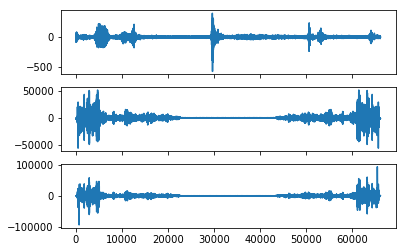

In [20]:
from numpy.fft import fft

f = fft(buf)

k, subx = plt.subplots(3, sharex = True)
subx[0].plot(buf)
subx[1].plot(np.real(f))
subx[2].plot(np.imag(f))

plt.show()

To co pierwsze uderza to charakterystyczna dla wykresów funkcji rzeczywistej symetria wykresów - bierze się ona z faktu, że o ile na wcześniejszych wykresach sumowaliśmy zespolone elementy, to sumowały się one do wyrazów rzeczywistych. Możliwe jest to wtedy, gdy ostatnie wyrazy są sprzężoną postacią pierwszych wyrazów, tj:

$$a_i = \bar a_{N-i} \qquad \text{dla i > 0}$$

Z powodu tej powtarzalności istnieje specjalna wersja transformacji Fouriera, nazywana Real Fast Fourier Transform (RFFT). Ma ona $N/2+1$ elementów. Pierwszy (tj. zerowy) element jest przesunięciem funkcji w osi OY. Kolejne elementy są amplitudami funkcji trygonometrycznych $\sin$ oraz $\cos$, albo, jak wcześniej ustaliliśmy - funkcji $\exp(2\pi\text i f t)$.

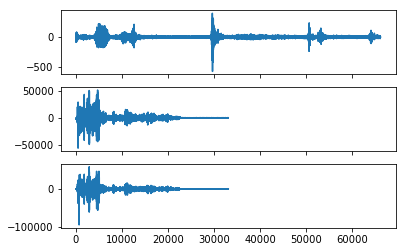

In [21]:
from numpy.fft import rfft

f = rfft(buf)

k, subx = plt.subplots(3, sharex = True)
subx[0].plot(buf)
subx[1].plot(np.real(f))
subx[2].plot(np.imag(f))

plt.show()

Podczas badania spektrum zależy nam nie na całkowitym obrazie (czyli, w zasadzie, uśrednionym natężeniu różnych częstotliwości), a na pomiarach chwilowych rozkładów częstotliwości. Dzieląc całe nagranie na wiele pomniejszych fragmentów jesteśmy w stanie faktycznie ustalić jakie częstotliwości dominowały w danej chwili.

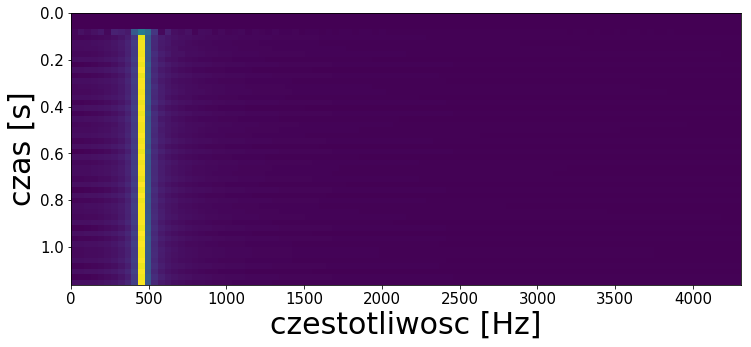

In [6]:
from numpy.fft import rfft
import pyaudio
import numpy as np
import wave
import matplotlib.pyplot as plt

def GenerateSpectra(name):
    wf = wave.open(name, 'rb')

    stream = pyaudio.PyAudio().open(
                    format = pyaudio.get_format_from_width(wf.getsampwidth()),
                    channels = wf.getnchannels(),
                    rate = wf.getframerate(),
                    output = True)

    Tab = []

    flag = False
    while True:
        data = wf.readframes(1024)
        buf = np.fromstring(data, np.int16)
        stream.write(data)
        if buf.shape[0] == 1024:
            buf = np.abs(rfft(buf))
            if flag:
                Tab = np.c_[Tab, buf]
            else:
                flag = True
                Tab = buf
        else: 
            break

    Tab = np.array(Tab)
    Tab = Tab[:100].T[:50]
    Time = Tab.shape[0]*1024./wf.getframerate()

    df = wf.getframerate()/1024.
    MaxFrequency = Tab.shape[1]*df

    fig, ax = plt.subplots(figsize=(12,5))
    ax.imshow(Tab, extent=[0,MaxFrequency,Time,0], aspect="auto")
    plt.xticks(fontsize=15)
    plt.xlabel("czestotliwosc [Hz]", fontsize = 30)
    plt.yticks(fontsize=15)
    plt.ylabel("czas [s]", fontsize = 30)
    plt.show()
    
GenerateSpectra("440.wav")

Powyżej przedstawiłem funkcję badającą częstotliwości w zależności od chwili czasu. Aby upewnić się że funkcja na pewno poprawnie przetwarza częstotliwości, użyłem testowego pliku dźwiękowego .wav z nagranym tonem 440 Hz.

Teraz załaduję inny plik z dwoma nagranymi po sobie tonami - C oraz Ges.

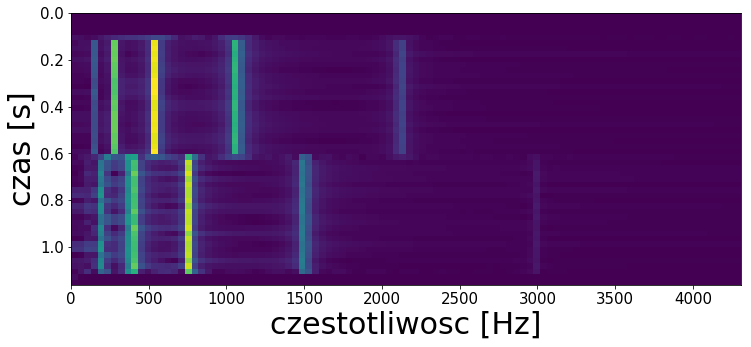

In [7]:
GenerateSpectra("Tritone.wav")


Na przykładzie widzimy tony razem z szeregiem kolejnych wielokrotności częstotliwości - wyższych harmonicznych.

Ostatnia rzecz - jeśli chcemy odzyskać oryginalną funkcję z jej transformacji fourierowskiej, możemy się oczywiście posłużyć funkcją $ifft$ (lub $irfft$ dla użytego przypadku rzeczywistego). Możemy również zastosować matematyczne sumowanie według wzoru:

$$f_k = \frac1N\sum_j \tilde f_j\exp\big(2\pi\text i \frac jN k\big)$$

In [19]:
import numpy as np

N = 16

a = np.random.rand(N)
b = np.fft.fft(a)
c = np.fft.ifft(b)

d = np.zeros(N)*1j

for i in range(N):
    d[i] = np.sum(b/N*np.exp(2j*np.pi*np.arange(N)*i/N))
    
print np.linalg.norm(a-c)
print np.linalg.norm(a-d)
print np.linalg.norm(c-d)

2.52865710861e-16
4.81082076554e-15
4.87536871816e-15


Zastosowany skrypt porównuje wynik automatycznej transformacji + odwrotnej transformacji oraz ręcznej transformacji odwrotnej.